# Apply different Architectures on MNIST dataset using Keras

In [0]:
import warnings
warnings.filterwarnings("ignore")
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal
#from keras.utils.visualize_util import to_graph
from keras.models import Sequential
#to_graph(Sequential())

# READING DATA

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 164s 14us/step


In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d,%d)"%(X_test.shape[1], X_test.shape[2]))


Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28,28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [0]:
# after converting the input images from 3d to 2d vectors
print("Number of training examples :", X_train.shape[0], "and each image is of shape(%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape(784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255
X_train = X_train/255
X_test = X_test/255

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])
# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# some model parameters
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 112
nb_epoch = 20
print(input_dim)

784


# Model 1 -- with 2 Hidden layers

# 1. MLP + ReLU + adam

In [0]:
from keras.layers import Activation, Dense

In [0]:
# Multilayer perceptron
# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni).
# h1 => σ=√(2/(fan_in) = 0.062 => N(0,σ) = N(0,0.062)
# h2 => σ=√(2/(fan_in) = 0.125 => N(0,σ) = N(0,0.125)
# out => σ=√(2/(fan_in+1) = 0.120 => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(325, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 610)               478850    
_________________________________________________________________
dense_2 (Dense)              (None, 325)               198575    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3260      
Total params: 680,685
Trainable params: 680,685
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.2113 - acc: 0.9366 - val_loss: 0.1056 - val_acc: 0.9668
Epoch 2/20
60000/60000 [==============================] - 17s 275us/step - loss: 0.0781 - acc: 0.9759 - val_loss: 0.0785 - val_acc: 0.9743
Epoch 3/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.0468 - acc: 0.9848 - val_loss: 0.0803 - val_acc: 0.9747
Epoch 4/20
60000/60000 [==============================] - 16s 266us/step - loss: 0.0330 - acc: 0.9896 - val_loss: 0.0759 - val_acc: 0.9763
Epoch 5/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.0261 - acc: 0.9914 - val_loss: 0.0733 - val_acc: 0.9788
Epoch 6/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.0209 - acc: 0.9931 - val_loss: 0.0723 - val_acc: 0.9796
Epoch 7/20
60000/60000 [==============================] - 17s 275us/

Train score: 0.01175171572082836
Train accuracy: 99.61166666666666

************************ *********************

Test score: 0.11959466045504177
Test accuracy: 97.82


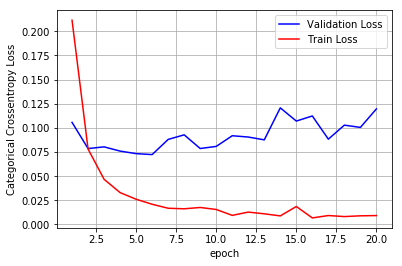

In [0]:
#Evaluate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Text(0.5, 0, 'output layer ')

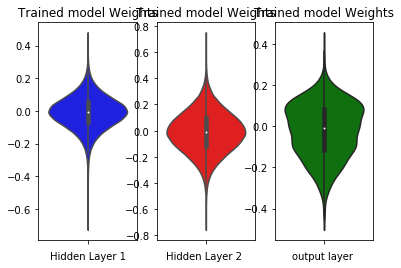

In [0]:
# Weights after trainning
# 1 2 3
# input->h1->h2->output
w_after = model_relu.get_weights()
# if 2 hidden layer then
# w_after[0]is the inpupt layer weights w_after[1]is the input layer bias weights input to hidden1
# w_after[2]is the hidde layer weights w_after[3]is the hidde layer bias weights hidden 1to hidden2
# w_after[4]is the hidde layer weights w_after[5]is the hidde layer bias weights hidden 2 to output
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")

ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')
plt.subplot(1, 3, 2)
plt.title("Trained model Weights")

ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")

ax = sns.violinplot(y=out_w, color='g')
plt.xlabel('output layer ')


# 2. MLP + ReLU + adam + batch__normalization

In [0]:
from keras.layers.normalization import BatchNormalization
model_batch = Sequential()
model_batch.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(325, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim, activation='softmax'))
model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 610)               478850    
_________________________________________________________________
batch_normalization_1 (Batch (None, 610)               2440      
_________________________________________________________________
dense_5 (Dense)              (None, 325)               198575    
_________________________________________________________________
batch_normalization_2 (Batch (None, 325)               1300      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3260      
Total params: 684,425
Trainable params: 682,555
Non-trainable params: 1,870
_________________________________________________________________


In [0]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 314us/step - loss: 0.1804 - acc: 0.9459 - val_loss: 0.1109 - val_acc: 0.9638
Epoch 2/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.0691 - acc: 0.9785 - val_loss: 0.0789 - val_acc: 0.9747
Epoch 3/20
60000/60000 [==============================] - 15s 258us/step - loss: 0.0432 - acc: 0.9864 - val_loss: 0.0747 - val_acc: 0.9762
Epoch 4/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.0320 - acc: 0.9902 - val_loss: 0.0815 - val_acc: 0.9748
Epoch 5/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.0253 - acc: 0.9920 - val_loss: 0.0845 - val_acc: 0.9747
Epoch 6/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.0210 - acc: 0.9934 - val_loss: 0.0792 - val_acc: 0.9781
Epoch 7/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.0208 - acc: 0.9934 - val_loss: 0.

Train score: 0.0036005233980133805
Train accuracy: 99.88333333333334

************************ *********************

Test score: 0.07985942602099326
Test accuracy: 98.2


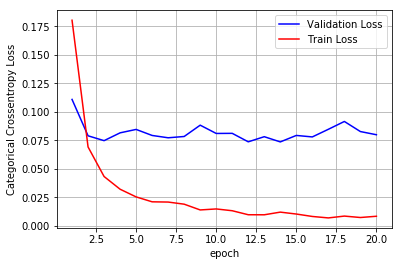

In [0]:
#Evaluate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_batch.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_batch.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Text(0.5, 0, 'output layer ')

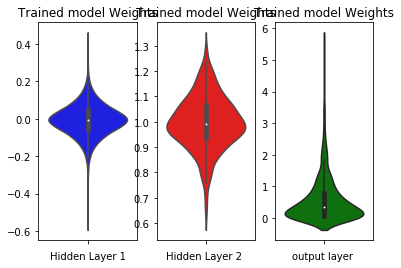

In [0]:
# Weights after trainning
# 1 2 3
# input->h1->h2->output
w_after = model_batch.get_weights()
# if 2 hidden layer then
# w_after[0]is the inpupt layer weights w_after[1]is the input layer bias weights input to hidden1
# w_after[2]is the hidde layer weights w_after[3]is the hidde layer bias weights hidden 1 to hidden2
# w_after[4]is the hidde layer weights w_after[5]is the hidde layer bias weights hidden 2 to output
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w, color='g')
plt.xlabel('output layer ')

# 3. MLP + ReLU + adam + dropout

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-inkeras
from keras.layers import Dropout
model_drop = Sequential()
model_drop.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(325, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55,seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(output_dim, activation='softmax'))
model_drop.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 610)               478850    
_________________________________________________________________
dropout_1 (Dropout)          (None, 610)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 325)               198575    
_________________________________________________________________
dropout_2 (Dropout)          (None, 325)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3260      
Total params: 680,685
Trainable params: 680,685
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.7305 - acc: 0.8101 - val_loss: 0.1879 - val_acc: 0.9447
Epoch 2/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.3038 - acc: 0.9110 - val_loss: 0.1403 - val_acc: 0.9594
Epoch 3/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.2430 - acc: 0.9283 - val_loss: 0.1160 - val_acc: 0.9659
Epoch 4/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.2077 - acc: 0.9398 - val_loss: 0.1064 - val_acc: 0.9686
Epoch 5/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.1861 - acc: 0.9460 - val_loss: 0.1031 - val_acc: 0.9724- lo
Epoch 6/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.1691 - acc: 0.9505 - val_loss: 0.0952 - val_acc: 0.9739
Epoch 7/20
60000/60000 [==============================] - 15s 250us/step - loss: 0.1559 - acc: 0.9536 - val_loss

Train score: 0.02664580340325483
Train accuracy: 99.25833333333334

************************ *********************

Test score: 0.08111033427524962
Test accuracy: 97.77


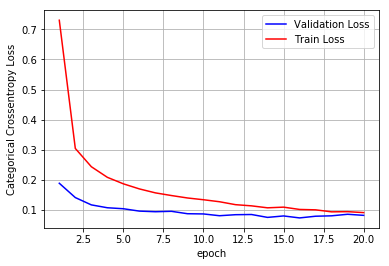

In [0]:
#Evaluate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_drop.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_drop.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
fig,ax = plt.subplots(1,1)

ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

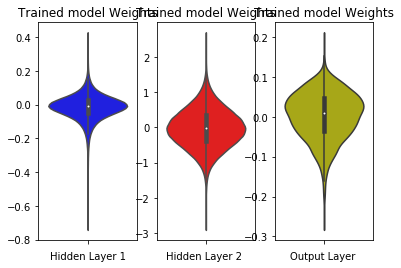

In [0]:
w_after = model_drop.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 4. MLP + ReLU + adam + dropout+ batch_normalization

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-inkeras
from keras.layers import Dropout
model_drop = Sequential()
model_drop.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(325, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55,seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(output_dim, activation='softmax'))
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 610)               478850    
_________________________________________________________________
batch_normalization_3 (Batch (None, 610)               2440      
_________________________________________________________________
dropout_3 (Dropout)          (None, 610)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 325)               198575    
_________________________________________________________________
batch_normalization_4 (Batch (None, 325)               1300      
_________________________________________________________________
dropout_4 (Dropout)          (None, 325)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                3260      
Total para

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 414us/step - loss: 0.4180 - acc: 0.8724 - val_loss: 0.1510 - val_acc: 0.9508
Epoch 2/20
60000/60000 [==============================] - 20s 334us/step - loss: 0.2214 - acc: 0.9328 - val_loss: 0.1119 - val_acc: 0.9643
Epoch 3/20
60000/60000 [==============================] - 20s 334us/step - loss: 0.1771 - acc: 0.9452 - val_loss: 0.0968 - val_acc: 0.9698
Epoch 4/20
60000/60000 [==============================] - 18s 307us/step - loss: 0.1513 - acc: 0.9536 - val_loss: 0.0906 - val_acc: 0.9714
Epoch 5/20
60000/60000 [==============================] - 19s 319us/step - loss: 0.1400 - acc: 0.9577 - val_loss: 0.0829 - val_acc: 0.9740
Epoch 6/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.1227 - acc: 0.9621 - val_loss: 0.0767 - val_acc: 0.9758
Epoch 7/20
60000/60000 [==============================] - 18s 305us/step - loss: 0.1181 - acc: 0.9627 - val_loss: 0.

Train score: 0.014805679358745692
Train accuracy: 99.53666666666666

************************ *********************

Test score: 0.05782464738052222
Test accuracy: 98.19


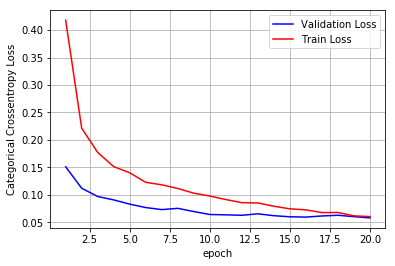

In [0]:
#Evaluate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_drop.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_drop.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

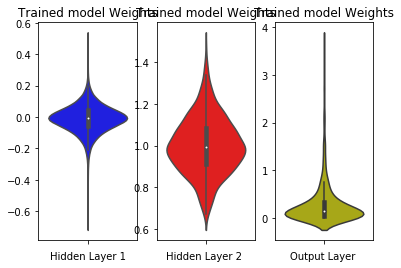

In [0]:
w_after = model_drop.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)
fig = plt.figure()
plt.title("Weight matrices after model trained")

plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Model 2 -- with 3 Hidden layers

# 1. MLP + ReLU + adam

In [0]:
# Multilayer perceptron
# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni).
# h1 => σ=√(2/(fan_in) = 0.062 => N(0,σ) = N(0,0.062)
# h2 => σ=√(2/(fan_in) = 0.125 => N(0,σ) = N(0,0.125)
# out => σ=√(2/(fan_in+1) = 0.120 => N(0,σ) = N(0,0.120)
model_relu = Sequential()
model_relu.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(420, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(210, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 610)               478850    
_________________________________________________________________
dense_14 (Dense)             (None, 420)               256620    
_________________________________________________________________
dense_15 (Dense)             (None, 210)               88410     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2110      
Total params: 825,990
Trainable params: 825,990
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 330us/step - loss: 0.2076 - acc: 0.9368 - val_loss: 0.0928 - val_acc: 0.9695
Epoch 2/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.0794 - acc: 0.9751 - val_loss: 0.0830 - val_acc: 0.9755
Epoch 3/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.0522 - acc: 0.9831 - val_loss: 0.0883 - val_acc: 0.9752
Epoch 4/20
60000/60000 [==============================] - 14s 239us/step - loss: 0.0383 - acc: 0.9879 - val_loss: 0.0944 - val_acc: 0.9699
Epoch 5/20
60000/60000 [==============================] - 15s 244us/step - loss: 0.0326 - acc: 0.9887 - val_loss: 0.0931 - val_acc: 0.9754
Epoch 6/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.0306 - acc: 0.9905 - val_loss: 0.0953 - val_acc: 0.9740
Epoch 7/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.0256 - acc: 0.9915 - val_loss: 0.

Train score: 0.011968852381023158
Train accuracy: 99.63833333333334

************************ *********************

Test score: 0.1038783551045065
Test accuracy: 97.99


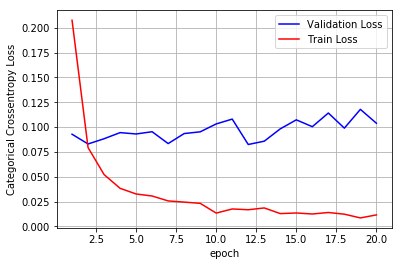

In [0]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

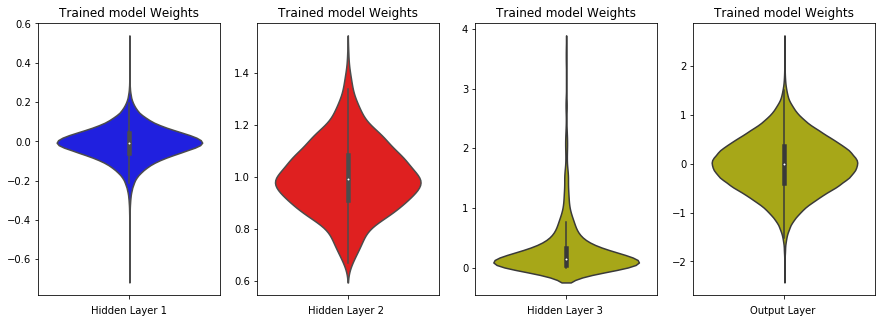

In [0]:
w_after = model_drop.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)
fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 2. MLP + ReLU + adam +batch_normalization

In [0]:
from keras.layers.normalization import BatchNormalization
model_batch = Sequential()
model_batch.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(420, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(210, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim, activation='softmax'))
model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 610)               478850    
_________________________________________________________________
batch_normalization_5 (Batch (None, 610)               2440      
_________________________________________________________________
dense_18 (Dense)             (None, 420)               256620    
_________________________________________________________________
batch_normalization_6 (Batch (None, 420)               1680      
_________________________________________________________________
dense_19 (Dense)             (None, 210)               88410     
_________________________________________________________________
batch_normalization_7 (Batch (None, 210)               840       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2110      
Total para

In [0]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 490us/step - loss: 0.1931 - acc: 0.9414 - val_loss: 0.1055 - val_acc: 0.9669
Epoch 2/20
60000/60000 [==============================] - 22s 373us/step - loss: 0.0697 - acc: 0.9786 - val_loss: 0.0878 - val_acc: 0.9723
Epoch 3/20
60000/60000 [==============================] - 20s 337us/step - loss: 0.0455 - acc: 0.9855 - val_loss: 0.0838 - val_acc: 0.9722
Epoch 4/20
60000/60000 [==============================] - 21s 342us/step - loss: 0.0358 - acc: 0.9889 - val_loss: 0.0874 - val_acc: 0.9747
Epoch 5/20
60000/60000 [==============================] - 22s 370us/step - loss: 0.0258 - acc: 0.9919 - val_loss: 0.0741 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 24s 394us/step - loss: 0.0216 - acc: 0.9927 - val_loss: 0.0791 - val_acc: 0.9775
Epoch 7/20
60000/60000 [==============================] - 21s 351us/step - loss: 0.0194 - acc: 0.9939 - val_loss: 0.

Train score: 0.00419184478967436
Train accuracy: 99.87833333333333

************************ *********************

Test score: 0.08813276136659533
Test accuracy: 98.03


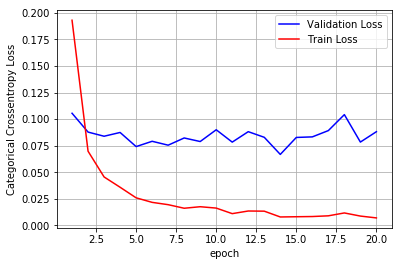

In [0]:
#Evaluate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_batch.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_batch.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


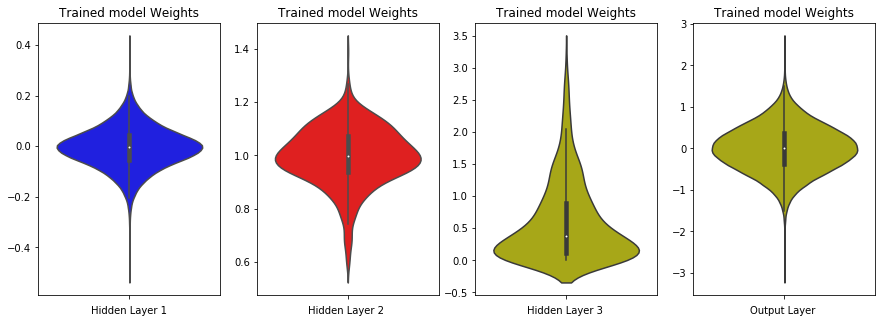

In [0]:
w_after = model_batch.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)
fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3. MLP + ReLU + adam +dropout

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-inkeras
from keras.layers import Dropout
model_drop = Sequential()
model_drop.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(420, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55,seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(210, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55,seed=None)) )
#model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(output_dim, activation='softmax'))
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 610)               478850    
_________________________________________________________________
dropout_5 (Dropout)          (None, 610)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 420)               256620    
_________________________________________________________________
dropout_6 (Dropout)          (None, 420)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 210)               88410     
_________________________________________________________________
dropout_7 (Dropout)          (None, 210)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2110      
Total para

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 222us/step - loss: 12.1946 - acc: 0.2356 - val_loss: 8.1071 - val_acc: 0.4922
Epoch 2/20
60000/60000 [==============================] - 12s 197us/step - loss: 9.5885 - acc: 0.3991 - val_loss: 7.1958 - val_acc: 0.5484
Epoch 3/20
60000/60000 [==============================] - 12s 200us/step - loss: 8.4335 - acc: 0.4718 - val_loss: 6.4075 - val_acc: 0.5999
Epoch 4/20
60000/60000 [==============================] - 12s 196us/step - loss: 7.5302 - acc: 0.5274 - val_loss: 4.6527 - val_acc: 0.7075
Epoch 5/20
60000/60000 [==============================] - 11s 185us/step - loss: 5.7684 - acc: 0.6372 - val_loss: 3.8773 - val_acc: 0.7567
Epoch 6/20
60000/60000 [==============================] - 10s 175us/step - loss: 4.9382 - acc: 0.6893 - val_loss: 3.2168 - val_acc: 0.7982
Epoch 7/20
60000/60000 [==============================] - 10s 174us/step - loss: 4.6853 - acc: 0.7055 - val_loss: 3

Train score: 2.7385955852190653
Train accuracy: 82.94666666666667

************************ *********************

Test score: 2.7042304149627685
Test accuracy: 83.14


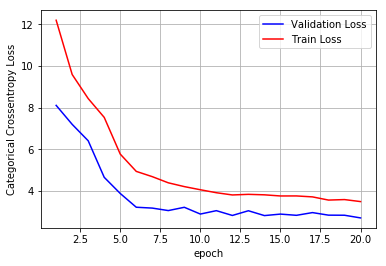

In [0]:
#Evaluate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_drop.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_drop.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

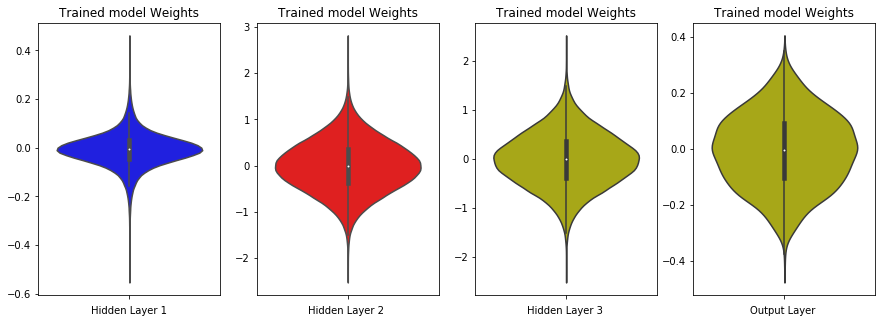

In [0]:
w_after = model_drop.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)
fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 4. MLP + ReLU + adam +dropout+batch_normalization

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-inkeras
from keras.layers import Dropout
model_drop = Sequential()
model_drop.add(Dense(610, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(420, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55,seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(210, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55,seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_drop.add(Dense(output_dim, activation='softmax'))
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 610)               478850    
_________________________________________________________________
batch_normalization_8 (Batch (None, 610)               2440      
_________________________________________________________________
dropout_8 (Dropout)          (None, 610)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 420)               256620    
_________________________________________________________________
batch_normalization_9 (Batch (None, 420)               1680      
_________________________________________________________________
dropout_9 (Dropout)          (None, 420)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 210)               88410     
__________

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 279us/step - loss: 0.6729 - acc: 0.7925 - val_loss: 0.1967 - val_acc: 0.9368
Epoch 2/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.3022 - acc: 0.9089 - val_loss: 0.1463 - val_acc: 0.9517
Epoch 3/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.2394 - acc: 0.9295 - val_loss: 0.1262 - val_acc: 0.9610
Epoch 4/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.2020 - acc: 0.9397 - val_loss: 0.1061 - val_acc: 0.9669
Epoch 5/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.1787 - acc: 0.9465 - val_loss: 0.0994 - val_acc: 0.9705
Epoch 6/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.1623 - acc: 0.9520 - val_loss: 0.0983 - val_acc: 0.9719
Epoch 7/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.1473 - acc: 0.9554 - val_loss: 0.

Train score: 0.02124301015394934
Train accuracy: 99.33166666666666

************************ *********************

Test score: 0.0627561581715534
Test accuracy: 98.21


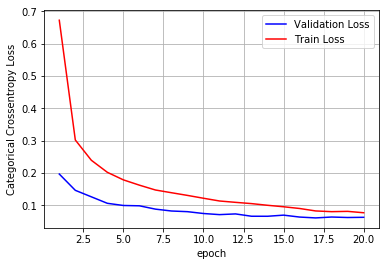

In [0]:
#Evaluate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_drop.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_drop.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

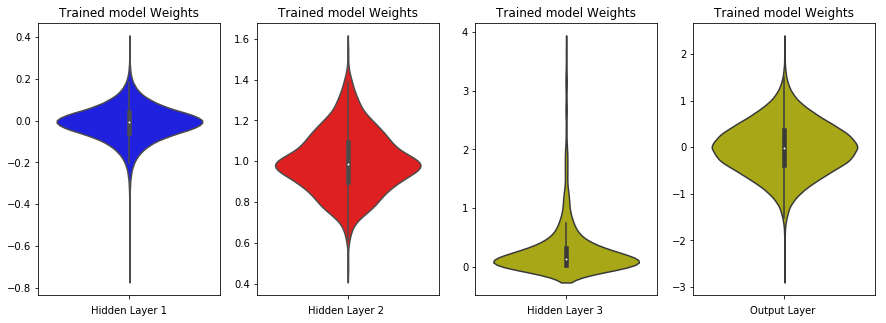

In [0]:
w_after = model_drop.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)
fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()


# Model 3 -- with 5 Hidden layers

# 1. MLP + ReLU + adam

In [0]:
# Multilayer perceptron
# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni).
# h1 => σ=√(2/(fan_in) = 0.062 => N(0,σ) = N(0,0.062)
# h2 => σ=√(2/(fan_in) = 0.125 => N(0,σ) = N(0,0.125)
# out => σ=√(2/(fan_in+1) = 0.120 => N(0,σ) = N(0,0.120)
model_relu = Sequential()
model_relu.add(Dense(690, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(530, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(412, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(231, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(112, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 690)               541650    
_________________________________________________________________
dense_30 (Dense)             (None, 530)               366230    
_________________________________________________________________
dense_31 (Dense)             (None, 412)               218772    
_________________________________________________________________
dense_32 (Dense)             (None, 231)               95403     
_________________________________________________________________
dense_33 (Dense)             (None, 112)               25984     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1130      
Total params: 1,249,169
Trainable params: 1,249,169
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 290us/step - loss: 0.2813 - acc: 0.9226 - val_loss: 0.1477 - val_acc: 0.9539
Epoch 2/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.1031 - acc: 0.9676 - val_loss: 0.1105 - val_acc: 0.9676
Epoch 3/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.0702 - acc: 0.9777 - val_loss: 0.1078 - val_acc: 0.9687
Epoch 4/20
60000/60000 [==============================] - 17s 283us/step - loss: 0.0554 - acc: 0.9823 - val_loss: 0.0959 - val_acc: 0.9752
Epoch 5/20
60000/60000 [==============================] - 16s 259us/step - loss: 0.0481 - acc: 0.9847 - val_loss: 0.0991 - val_acc: 0.9724
Epoch 6/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.0409 - acc: 0.9870 - val_loss: 0.0890 - val_acc: 0.9738
Epoch 7/20
60000/60000 [==============================] - 15s 258us/step - loss: 0.0354 - acc: 0.9890 - val_loss: 0.

Train score: 0.007615429904182383
Train accuracy: 99.78333333333333

************************ *********************

Test score: 0.09702783975718078
Test accuracy: 98.02


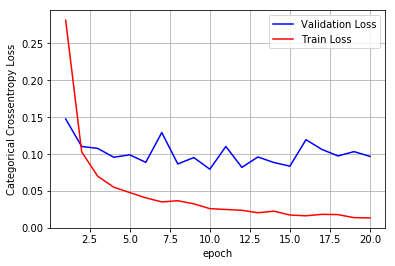

In [0]:
#Evaluate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


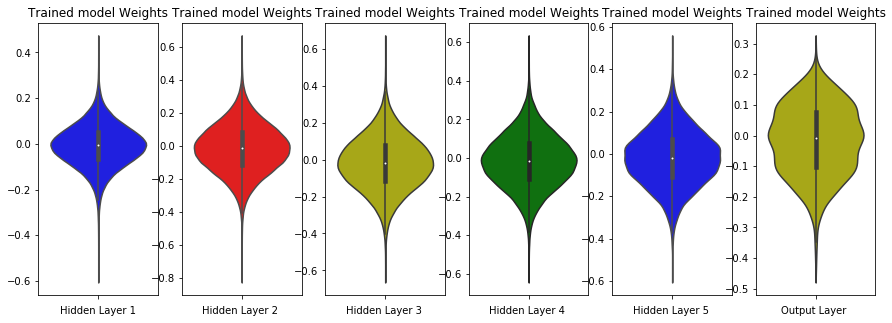

In [0]:
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)
fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 2. MLP + ReLU + adam +batch_normalization

In [0]:
# Multilayer perceptron
# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni).
# h1 => σ=√(2/(fan_in) = 0.062 => N(0,σ) = N(0,0.062)
# h2 => σ=√(2/(fan_in) = 0.125 => N(0,σ) = N(0,0.125)
# out => σ=√(2/(fan_in+1) = 0.120 => N(0,σ) = N(0,0.120)
model_relu = Sequential()
model_relu.add(Dense(690, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(530, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(412, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(231, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(112, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 690)               541650    
_________________________________________________________________
batch_normalization_11 (Batc (None, 690)               2760      
_________________________________________________________________
dense_36 (Dense)             (None, 530)               366230    
_________________________________________________________________
batch_normalization_12 (Batc (None, 530)               2120      
_________________________________________________________________
dense_37 (Dense)             (None, 412)               218772    
_________________________________________________________________
batch_normalization_13 (Batc (None, 412)               1648      
_________________________________________________________________
dense_38 (Dense)             (None, 231)               95403     
__________

In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 383us/step - loss: 0.2023 - acc: 0.9385 - val_loss: 0.1073 - val_acc: 0.9675
Epoch 2/20
60000/60000 [==============================] - 18s 305us/step - loss: 0.0737 - acc: 0.9770 - val_loss: 0.0832 - val_acc: 0.9740
Epoch 3/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.0562 - acc: 0.9816 - val_loss: 0.0765 - val_acc: 0.9750
Epoch 4/20
60000/60000 [==============================] - 21s 344us/step - loss: 0.0384 - acc: 0.9880 - val_loss: 0.0715 - val_acc: 0.9772
Epoch 5/20
60000/60000 [==============================] - 20s 333us/step - loss: 0.0367 - acc: 0.9874 - val_loss: 0.0700 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 18s 297us/step - loss: 0.0305 - acc: 0.9901 - val_loss: 0.0841 - val_acc: 0.9759
Epoch 7/20
60000/60000 [==============================] - 19s 313us/step - loss: 0.0315 - acc: 0.9895 - val_loss: 0.

Train score: 0.006093753856421487
Train accuracy: 99.79833333333333

************************ *********************

Test score: 0.06601150656397804
Test accuracy: 98.34


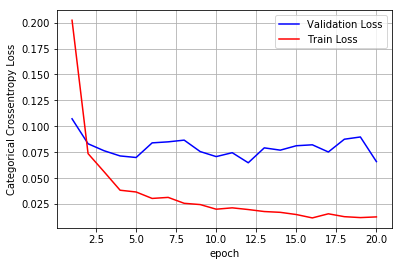

In [0]:
#Evaluate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

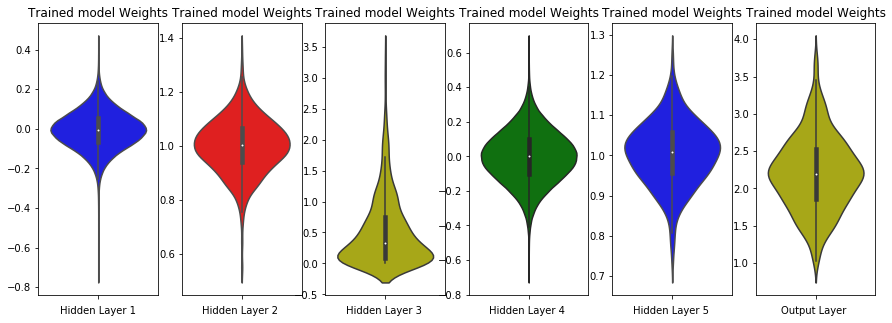

In [0]:
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)
fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()


# 3. MLP + ReLU + adam + dropout

In [0]:
# Multilayer perceptron
# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni).
# h1 => σ=√(2/(fan_in) = 0.062 => N(0,σ) = N(0,0.062)
# h2 => σ=√(2/(fan_in) = 0.125 => N(0,σ) = N(0,0.125)
# out => σ=√(2/(fan_in+1) = 0.120 => N(0,σ) = N(0,0.120)
model_relu = Sequential()
model_relu.add(Dense(690, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(530, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(412, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(231, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(112, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
#model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 690)               541650    
_________________________________________________________________
dropout_11 (Dropout)         (None, 690)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 530)               366230    
_________________________________________________________________
dropout_12 (Dropout)         (None, 530)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 412)               218772    
_________________________________________________________________
dropout_13 (Dropout)         (None, 412)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 231)               95403     
__________

In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 282us/step - loss: 8.8255 - acc: 0.2601 - val_loss: 1.2662 - val_acc: 0.6625
Epoch 2/20
60000/60000 [==============================] - 14s 240us/step - loss: 1.3211 - acc: 0.5528 - val_loss: 0.7544 - val_acc: 0.7617
Epoch 3/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.8694 - acc: 0.7162 - val_loss: 0.5276 - val_acc: 0.8670
Epoch 4/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.6193 - acc: 0.8110 - val_loss: 0.3173 - val_acc: 0.9238
Epoch 5/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.4821 - acc: 0.8656 - val_loss: 0.2496 - val_acc: 0.9372
Epoch 6/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.4034 - acc: 0.8948 - val_loss: 0.2200 - val_acc: 0.9475
Epoch 7/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.3484 - acc: 0.9117 - val_loss: 0.

Train score: 0.06144777707796311
Train accuracy: 98.44166666666668

************************ *********************

Test score: 0.11881388411391526
Test accuracy: 97.36


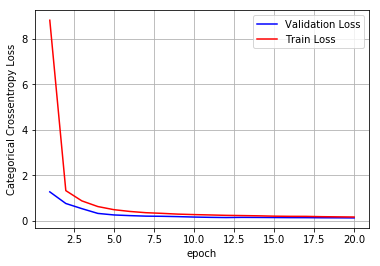

In [0]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

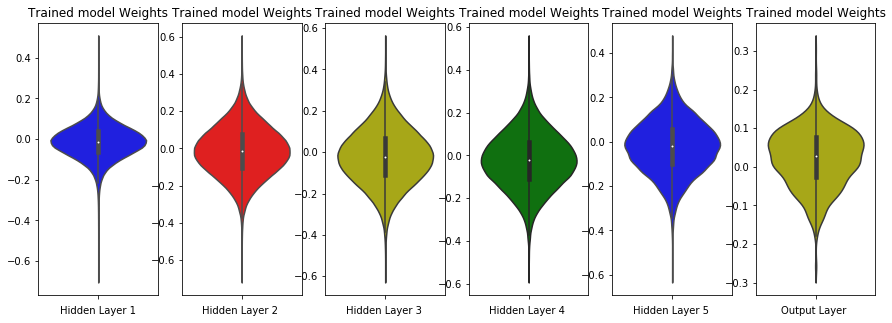

In [0]:
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)
fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()


# 4. MLP + ReLU + adam + dropout + batch_normalization

In [0]:
# Multilayer perceptron
# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni).
# h1 => σ=√(2/(fan_in) = 0.062 => N(0,σ) = N(0,0.062)
# h2 => σ=√(2/(fan_in) = 0.125 => N(0,σ) = N(0,0.125)
# out => σ=√(2/(fan_in+1) = 0.120 => N(0,σ) = N(0,0.120)
model_relu = Sequential()
model_relu.add(Dense(690, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(530, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(412, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(231, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(112, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))
model_relu.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 690)               541650    
_________________________________________________________________
batch_normalization_16 (Batc (None, 690)               2760      
_________________________________________________________________
dropout_16 (Dropout)         (None, 690)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 530)               366230    
_________________________________________________________________
batch_normalization_17 (Batc (None, 530)               2120      
_________________________________________________________________
dropout_17 (Dropout)         (None, 530)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 412)               218772    
__________

In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 428us/step - loss: 1.0527 - acc: 0.6697 - val_loss: 0.2500 - val_acc: 0.9261
Epoch 2/20
60000/60000 [==============================] - 21s 357us/step - loss: 0.3679 - acc: 0.8910 - val_loss: 0.1626 - val_acc: 0.9519
Epoch 3/20
60000/60000 [==============================] - 24s 406us/step - loss: 0.2647 - acc: 0.9257 - val_loss: 0.1312 - val_acc: 0.9607
Epoch 4/20
60000/60000 [==============================] - 24s 404us/step - loss: 0.2213 - acc: 0.9374 - val_loss: 0.1179 - val_acc: 0.9667
Epoch 5/20
60000/60000 [==============================] - 23s 385us/step - loss: 0.1919 - acc: 0.9465 - val_loss: 0.1039 - val_acc: 0.9714
Epoch 6/20
60000/60000 [==============================] - 24s 407us/step - loss: 0.1700 - acc: 0.9528 - val_loss: 0.0911 - val_acc: 0.9737
Epoch 7/20
60000/60000 [==============================] - 22s 375us/step - loss: 0.1557 - acc: 0.9561 - val_loss: 0.

Train score: 0.019241652972002823
Train accuracy: 99.47833333333334

************************ *********************

Test score: 0.06302054594261572
Test accuracy: 98.3


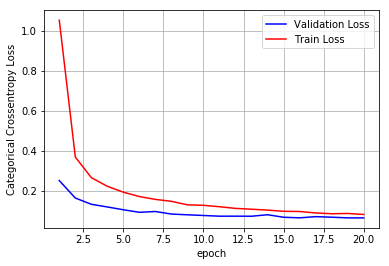

In [0]:
#Evualate your model with accuracy and plot of (NUmber of epoches VS train_and_val_loss)
#Train accuracy
score = model_relu.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model_relu.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,nb_epoch+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

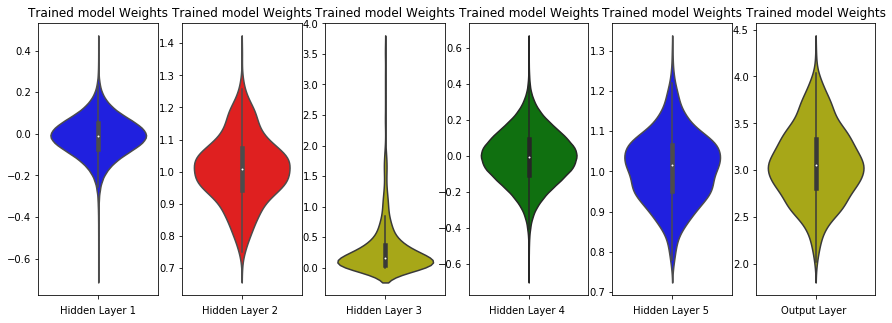

In [0]:
w_after = model_relu.get_weights()
h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)
fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()


# CONCLUSION:

In [0]:
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("Hidden Layers", "Model", "Accuracy")
tb.add_row(["2", "MLP + ADAM + RELU",97.82])
tb.add_row(["2", "MLP + ADAM + RELU + batch_normalization",98.2])
tb.add_row(["2", "MLP + ADAM + RELU + dropout",97.77])
tb.add_row(["2", "MLP + ADAM + RELU + dropout+ batch_normalization",98.19])
tb.add_row([" ", " "," "])
tb.add_row([" ", " "," "])
tb.field_names= ("Hidden Layers", "Model", "Accuracy")
tb.add_row(["3", "MLP + ADAM + RELU",97.99])
tb.add_row(["3", "MLP + ADAM + RELU + batch_normalization",98.03])
tb.add_row(["3", "MLP + ADAM + RELU + dropout",83.14])
tb.add_row(["3", "MLP + ADAM + RELU + dropout+ batch_normalization",98.21])
tb.add_row([" ", " "," "])
tb.add_row([" ", " "," "])
tb.field_names= ("Hidden Layers", "Model", "Accuracy")
tb.add_row(["5", "MLP + ADAM + RELU",98.02])
tb.add_row(["5", "MLP + ADAM + RELU + batch_normalization",98.34])
tb.add_row(["5", "MLP + ADAM + RELU + dropout",97.36])
tb.add_row(["5", "MLP + ADAM + RELU + dropout+ batch_normalization",98.3])
print(tb.get_string(titles = "MLP Models - Observations"))

+---------------+--------------------------------------------------+----------+
| Hidden Layers |                      Model                       | Accuracy |
+---------------+--------------------------------------------------+----------+
|       2       |                MLP + ADAM + RELU                 |  97.82   |
|       2       |     MLP + ADAM + RELU + batch_normalization      |   98.2   |
|       2       |           MLP + ADAM + RELU + dropout            |  97.77   |
|       2       | MLP + ADAM + RELU + dropout+ batch_normalization |  98.19   |
|               |                                                  |          |
|               |                                                  |          |
|       3       |                MLP + ADAM + RELU                 |  97.99   |
|       3       |     MLP + ADAM + RELU + batch_normalization      |  98.03   |
|       3       |           MLP + ADAM + RELU + dropout            |  83.14   |
|       3       | MLP + ADAM + RELU + dr